#### Dataset Description:

**ID**: ID of each client  
**AMT**: Amount of given credit in dollars (includes individual and family/supplementary credit  
**GENDER**: Gender (1=male, 2=female)  
**EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)  
**MARITAL STATUS**: Marital status (1=married, 2=single, 3=others)  
**AGE**: Age in years  
**REPAY_SEP**: Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  
**REPAY_AUG**: Repayment status in August, 2005 (scale same as above)  
**REPAY_JUL**: Repayment status in July, 2005 (scale same as above)  
**REPAY_JUN**: Repayment status in June, 2005 (scale same as above)  
**REPAY_MAY**: Repayment status in May, 2005 (scale same as above)  
**REPAY_APR**: Repayment status in April, 2005 (scale same as above)  
**AMTBILL_SEP**: Amount of bill statement in September, 2005  
**AMTBILL_AUG**: Amount of bill statement in August, 2005  
**AMTBILL_JUL**: Amount of bill statement in July, 2005  
**AMTBILL_JUN**: Amount of bill statement in June, 2005  
**AMTBILL_MAY**: Amount of bill statement in May, 2005  
**AMTBILL_APR**: Amount of bill statement in April, 2005  
**PRE_SEP**: Amount of previous payment in September, 2005  
**PRE_AUG**: Amount of previous payment in August, 2005  
**PRE_JUL**: Amount of previous payment in July, 2005  
**PRE_JUN**: Amount of previous payment in June, 2005  
**PRE_MAY**: Amount of previous payment in May, 2005  
**PRE_APR**: Amount of previous payment in April, 2005  
**DEF_AMT**: Default payment (1=yes, 0=no)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
#Displaying all the columns in dataframe
pd.set_option("display.max_columns", None)

#Loading the data set
credit_data_df = pd.read_csv("Credit Dataset for HV Turnkey Lender.csv")
credit_data_df.head()

,ID,AMT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_JUL,REPAY_JUN,REPAY_MAY,REPAY_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,DEF_AMT
0,1,20000.0,2,2.0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2.0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Cleaning:

In [84]:
#Re-arranging the columns positions for easy analysis
credit_data_df = credit_data_df.loc[:, ["AMT", "GENDER", "EDUCATION", "MARITAL STATUS", "AGE",
                                        "REPAY_APR", "AMTBILL_APR", "PRE_APR",
                                        "REPAY_MAY","AMTBILL_MAY","PRE_MAY",
                                        "REPAY_JUN","AMTBILL_JUN","PRE_JUN",
                                        "REPAY_JUL", "AMTBILL_JUL", "PRE_JUL",
                                        "REPAY_AUG","AMTBILL_AUG","PRE_AUG",
                                        "REPAY_SEP","AMTBILL_SEP","PRE_SEP",
                                        "DEF_AMT"]]

#Replacing values in Categorical variables in correct form
credit_data_df["GENDER"] = credit_data_df["GENDER"].map(lambda x: "Male" if x == 1 else "Female")
credit_data_df["EDUCATION"] = credit_data_df["EDUCATION"].replace([1,2,3,4,5],["Graduate School", "University", "High School", "Other", "Unknown"])
credit_data_df["MARITAL STATUS"] = credit_data_df["MARITAL STATUS"].replace([1,2,3],["Married", "Single", "Other"])
#credit_data_df["DEF_AMT"] = credit_data_df["DEF_AMT"].replace([0,1],["No", "Yes"])

#Rename column names
credit_data_df.rename(columns = {"AMT":"CREDIT_LIMIT", "DEF_AMT": "DEFAULTED NEXT MONTH"}, inplace = True)

In [85]:
credit_data_df.shape

(30000, 24)

In [86]:
credit_data_df.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_APR,AMTBILL_APR,PRE_APR,REPAY_MAY,AMTBILL_MAY,PRE_MAY,REPAY_JUN,AMTBILL_JUN,PRE_JUN,REPAY_JUL,AMTBILL_JUL,PRE_JUL,REPAY_AUG,AMTBILL_AUG,PRE_AUG,REPAY_SEP,AMTBILL_SEP,PRE_SEP,DEFAULTED NEXT MONTH
0,20000.0,Female,University,Married,24,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,689.0,0.0,2,3102.0,689.0,2,3913.0,0.0,1
1,120000.0,Female,University,Single,26,2,3261.0,2000.0,0,3455.0,0.0,0,3272.0,1000.0,0,2682.0,1000.0,2,1725.0,1000.0,0,2682.0,0.0,1
2,90000.0,Female,University,Single,34,0,15549.0,5000.0,0,14948.0,1000.0,0,14331.0,1000.0,0,13559.0,1000.0,0,14027.0,1500.0,0,29239.0,1518.0,0
3,50000.0,Female,University,Married,37,0,29547.0,1000.0,0,28959.0,1069.0,0,28314.0,1100.0,0,49291.0,1200.0,0,48233.0,2019.0,0,46990.0,2000.0,0
4,50000.0,Male,University,Married,57,0,19131.0,679.0,0,19146.0,689.0,0,20940.0,9000.0,0,35835.0,10000.0,0,5670.0,36681.0,0,8617.0,2000.0,0


In [87]:
#Checking for missing values in the data
credit_data_df.isnull().sum()

CREDIT_LIMIT             0
GENDER                   0
EDUCATION               14
MARITAL STATUS           0
AGE                      0
REPAY_APR                0
AMTBILL_APR              0
PRE_APR                  0
REPAY_MAY                0
AMTBILL_MAY              0
PRE_MAY                  0
REPAY_JUN                0
AMTBILL_JUN              0
PRE_JUN                  0
REPAY_JUL                0
AMTBILL_JUL              0
PRE_JUL                  0
REPAY_AUG                0
AMTBILL_AUG              0
PRE_AUG                  0
REPAY_SEP                0
AMTBILL_SEP              0
PRE_SEP                  0
DEFAULTED NEXT MONTH     0
dtype: int64

In [88]:
#removing the rows with null values
credit_data_df.dropna(inplace=True)

In [89]:
#Checking for duplicate rows of data
credit_data_df.duplicated().sum()

36

In [90]:
#Dropping the duplicate rows
credit_data_df.drop_duplicates(inplace = True)

In [91]:
credit_data_df.reset_index(drop = True, inplace= True)

In [92]:
credit_data_df

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_APR,AMTBILL_APR,PRE_APR,REPAY_MAY,AMTBILL_MAY,PRE_MAY,REPAY_JUN,AMTBILL_JUN,PRE_JUN,REPAY_JUL,AMTBILL_JUL,PRE_JUL,REPAY_AUG,AMTBILL_AUG,PRE_AUG,REPAY_SEP,AMTBILL_SEP,PRE_SEP,DEFAULTED NEXT MONTH
0,20000.0,Female,University,Married,24,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,689.0,0.0,2,3102.0,689.0,2,3913.0,0.0,1
1,120000.0,Female,University,Single,26,2,3261.0,2000.0,0,3455.0,0.0,0,3272.0,1000.0,0,2682.0,1000.0,2,1725.0,1000.0,0,2682.0,0.0,1
2,90000.0,Female,University,Single,34,0,15549.0,5000.0,0,14948.0,1000.0,0,14331.0,1000.0,0,13559.0,1000.0,0,14027.0,1500.0,0,29239.0,1518.0,0
3,50000.0,Female,University,Married,37,0,29547.0,1000.0,0,28959.0,1069.0,0,28314.0,1100.0,0,49291.0,1200.0,0,48233.0,2019.0,0,46990.0,2000.0,0
4,50000.0,Male,University,Married,57,0,19131.0,679.0,0,19146.0,689.0,0,20940.0,9000.0,0,35835.0,10000.0,0,5670.0,36681.0,0,8617.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,220000.0,Male,High School,Married,39,0,15980.0,1000.0,0,31237.0,5000.0,0,88004.0,3047.0,0,208365.0,5003.0,0,192815.0,20000.0,0,188948.0,8500.0,0
29946,150000.0,Male,High School,Single,43,0,0.0,0.0,0,5190.0,0.0,0,8979.0,129.0,0,3502.0,8998.0,0,1828.0,3526.0,0,1683.0,1837.0,0
29947,30000.0,Male,University,Single,37,0,19357.0,3100.0,0,20582.0,2000.0,0,20878.0,4200.0,2,2758.0,22000.0,3,3356.0,0.0,4,3565.0,0.0,1
29948,80000.0,Male,High School,Married,41,0,48944.0,1804.0,0,11855.0,52964.0,0,52774.0,1926.0,0,76304.0,1178.0,0,78379.0,3409.0,1,645.0,85900.0,1


### Exploratory Data Analysis (EDA):

In [93]:
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29950 entries, 0 to 29949
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CREDIT_LIMIT          29950 non-null  float64
 1   GENDER                29950 non-null  object 
 2   EDUCATION             29950 non-null  object 
 3   MARITAL STATUS        29950 non-null  object 
 4   AGE                   29950 non-null  int64  
 5   REPAY_APR             29950 non-null  int64  
 6   AMTBILL_APR           29950 non-null  float64
 7   PRE_APR               29950 non-null  float64
 8   REPAY_MAY             29950 non-null  int64  
 9   AMTBILL_MAY           29950 non-null  float64
 10  PRE_MAY               29950 non-null  float64
 11  REPAY_JUN             29950 non-null  int64  
 12  AMTBILL_JUN           29950 non-null  float64
 13  PRE_JUN               29950 non-null  float64
 14  REPAY_JUL             29950 non-null  int64  
 15  AMTBILL_JUL        

In [94]:
#Summarizing the data
credit_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CREDIT_LIMIT,29950.0,167418.353255,129775.615128,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,29950.0,35.486077,9.220082,21.0,28.00,34.0,41.00,79.0
REPAY_APR,29950.0,0.226811,0.715644,0.0,0.00,0.0,0.00,8.0
AMTBILL_APR,29950.0,38969.854858,59540.776467,-339603.0,1280.00,17135.0,49276.75,961664.0
PRE_APR,29950.0,5222.694190,17791.119701,0.0,132.25,1500.0,4000.00,528666.0
REPAY_MAY,29950.0,0.221736,0.717931,0.0,0.00,0.0,0.00,8.0
AMTBILL_MAY,29950.0,40391.246043,60815.207103,-81334.0,1796.25,18136.5,50271.50,927171.0
PRE_MAY,29950.0,4806.102170,15290.014391,0.0,261.00,1500.0,4041.75,426529.0
REPAY_JUN,29950.0,0.258998,0.761304,0.0,0.00,0.0,0.00,8.0
AMTBILL_JUN,29950.0,43352.927012,64341.586267,-81334.0,2377.50,19088.5,54615.75,891586.0


**Any time a negative dollar amount shows up on a credit card balance, it means the bank owes the account holder money. The negative balance will zero out or become a positive balance as the cardholder charges additional purchases.**

In [95]:
num_total = credit_data_df.shape[0]
num_default = credit_data_df[credit_data_df["DEFAULTED NEXT MONTH"] == 1].shape[0]
default_pct = num_default/num_total*100
print(f"The default rate is {round(default_pct,2)}%")

The default rate is 22.14%


The categorical variables are ['GENDER', 'EDUCATION', 'MARITAL STATUS'] 



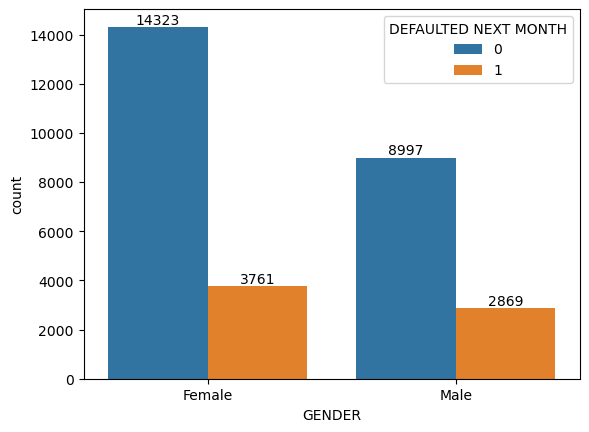

--------------------------------------------------------------------------------------


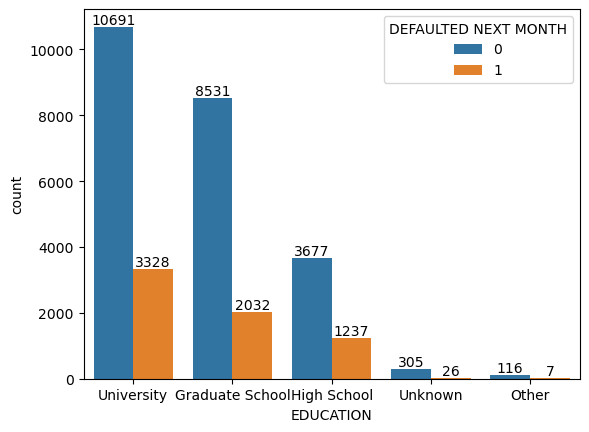

--------------------------------------------------------------------------------------


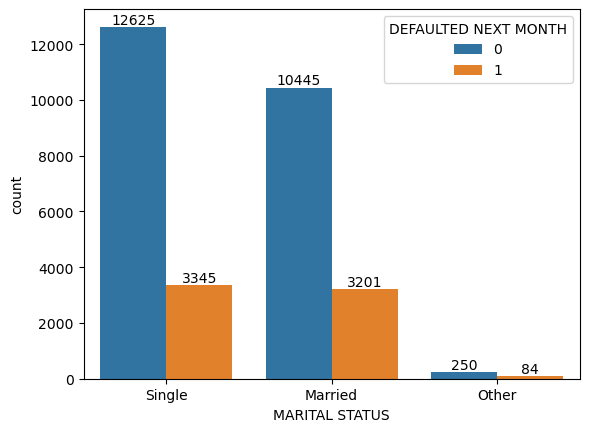

--------------------------------------------------------------------------------------


In [96]:
#Creating a plot for distribution of categorical variables by Default Next Month
cat_variables = credit_data_df.select_dtypes(include="object").columns
print("The categorical variables are",list(cat_variables),"\n")

for var in cat_variables:
    cat_count_plot = sns.countplot(data=credit_data_df, x=var, hue = "DEFAULTED NEXT MONTH", order=credit_data_df[var].value_counts().index)
    
    #Putting the values of each distribution on the bar
    for label in cat_count_plot.containers:
        cat_count_plot.bar_label(label)
        
    plt.show()
    print("--------------------------------------------------------------------------------------")

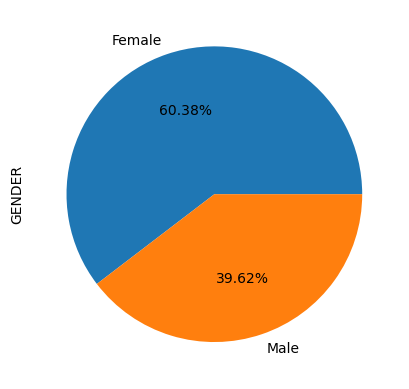

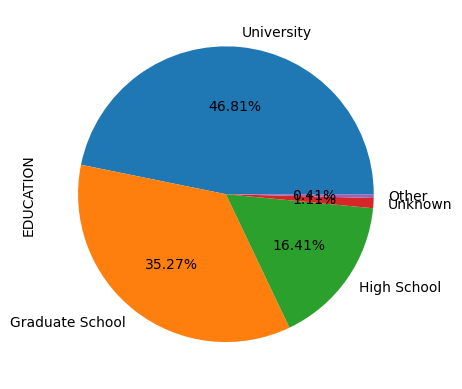

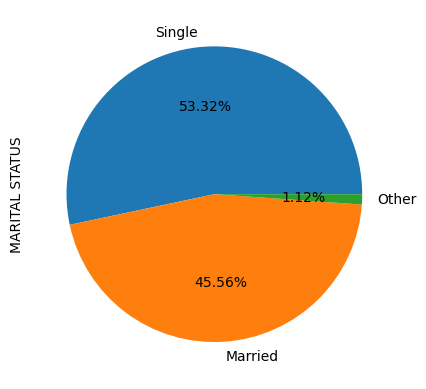

In [97]:
for var in cat_variables:
    pd.value_counts(credit_data_df[var]).plot(kind="pie", autopct ="%0.2f%%")
    plt.show()

### Feature Engineering:

In [98]:
#Creating a Due Past Month calculated column to find number of months customer is paid late in past 6 months.
repay_cols = ["REPAY_APR", "REPAY_MAY", "REPAY_JUN", "REPAY_JUL", "REPAY_AUG", "REPAY_SEP"]
DPM = []
for i in range(0, 29950):
    count = 0
    for col in repay_cols:
        if credit_data_df.loc[i, col] > 0:
            count += 1
    DPM.append(count)
    
credit_data_df["DPM"] = DPM

In [99]:
#creating a categorical variable from Age
credit_data_df["AGE_BIN"] = pd.cut(credit_data_df["AGE"], bins= range(20,90,5))
credit_data_df

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_APR,AMTBILL_APR,PRE_APR,REPAY_MAY,AMTBILL_MAY,PRE_MAY,REPAY_JUN,AMTBILL_JUN,PRE_JUN,REPAY_JUL,AMTBILL_JUL,PRE_JUL,REPAY_AUG,AMTBILL_AUG,PRE_AUG,REPAY_SEP,AMTBILL_SEP,PRE_SEP,DEFAULTED NEXT MONTH,DPM,AGE_BIN
0,20000.0,Female,University,Married,24,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,689.0,0.0,2,3102.0,689.0,2,3913.0,0.0,1,2,"(20, 25]"
1,120000.0,Female,University,Single,26,2,3261.0,2000.0,0,3455.0,0.0,0,3272.0,1000.0,0,2682.0,1000.0,2,1725.0,1000.0,0,2682.0,0.0,1,2,"(25, 30]"
2,90000.0,Female,University,Single,34,0,15549.0,5000.0,0,14948.0,1000.0,0,14331.0,1000.0,0,13559.0,1000.0,0,14027.0,1500.0,0,29239.0,1518.0,0,0,"(30, 35]"
3,50000.0,Female,University,Married,37,0,29547.0,1000.0,0,28959.0,1069.0,0,28314.0,1100.0,0,49291.0,1200.0,0,48233.0,2019.0,0,46990.0,2000.0,0,0,"(35, 40]"
4,50000.0,Male,University,Married,57,0,19131.0,679.0,0,19146.0,689.0,0,20940.0,9000.0,0,35835.0,10000.0,0,5670.0,36681.0,0,8617.0,2000.0,0,0,"(55, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,220000.0,Male,High School,Married,39,0,15980.0,1000.0,0,31237.0,5000.0,0,88004.0,3047.0,0,208365.0,5003.0,0,192815.0,20000.0,0,188948.0,8500.0,0,0,"(35, 40]"
29946,150000.0,Male,High School,Single,43,0,0.0,0.0,0,5190.0,0.0,0,8979.0,129.0,0,3502.0,8998.0,0,1828.0,3526.0,0,1683.0,1837.0,0,0,"(40, 45]"
29947,30000.0,Male,University,Single,37,0,19357.0,3100.0,0,20582.0,2000.0,0,20878.0,4200.0,2,2758.0,22000.0,3,3356.0,0.0,4,3565.0,0.0,1,3,"(35, 40]"
29948,80000.0,Male,High School,Married,41,0,48944.0,1804.0,0,11855.0,52964.0,0,52774.0,1926.0,0,76304.0,1178.0,0,78379.0,3409.0,1,645.0,85900.0,1,1,"(40, 45]"


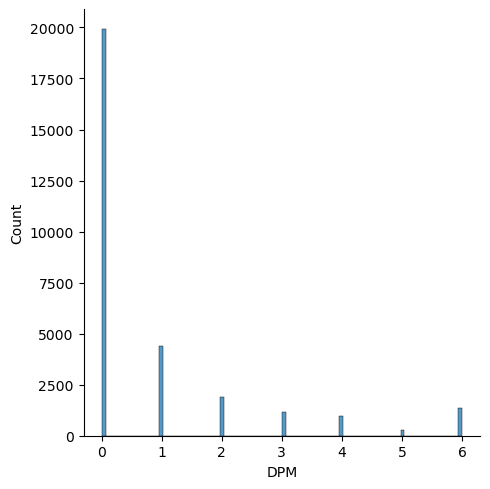

In [100]:
sns.displot(data=credit_data_df, x= "DPM")

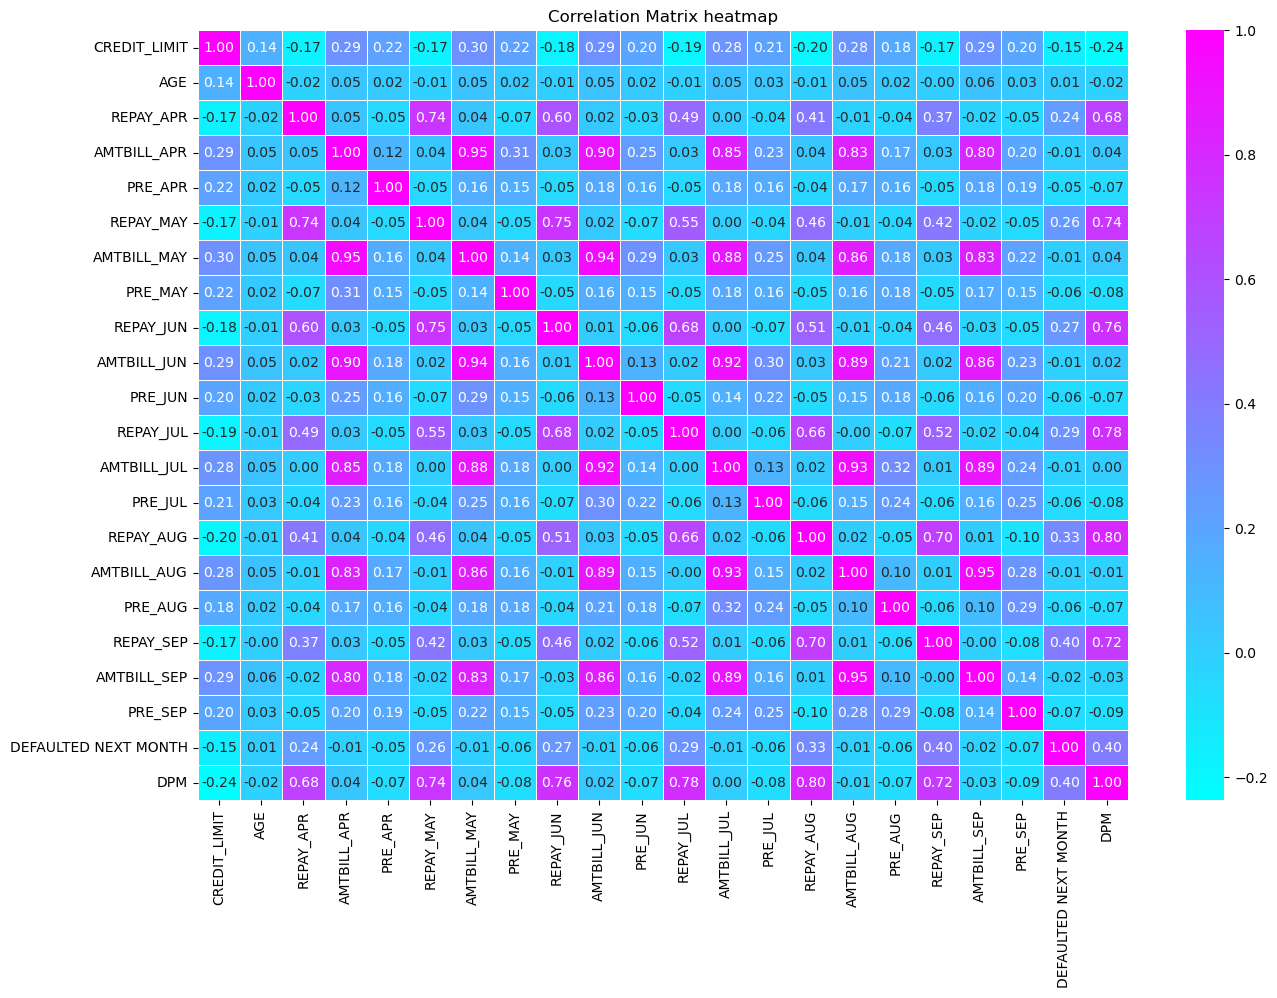

In [101]:
#Plot for correlation of numerical vairables in the data

plt.figure(figsize=(15,10))
correlation_matrix = credit_data_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= "cool", linewidths= 0.7)
plt.title("Correlation Matrix heatmap")
plt.show()

### Chi-Square Test of Factor Association:

**Hypothesis Testing:  
Null Hypothesis: GENDER and DEFAULTED_NEXT_MONTH are independent of each other  
Alternate Hypothesis: GENDER and DEFAULTED_NEXT_MONTH are dependent/related**

In [102]:
cross_gender_default = pd.crosstab(credit_data_df["GENDER"], credit_data_df["DEFAULTED NEXT MONTH"])
cross_gender_default

DEFAULTED NEXT MONTH,0,1
GENDER,,
Female,14323,3761
Male,8997,2869


In [103]:
from scipy.stats import chi2_contingency

stats,p,dof,expected = chi2_contingency(cross_gender_default)
print("The p value is",p)

alpha = 0.05
if p<=alpha:
    print("Gender and Defaulted are Dependent (Reject Null Hypothesis)")
else:
    print("Gender and Defaulted are Independent (Failed to reject the Null Hypothesis)")

The p value is 6.033508963614716e-12
Gender and Defaulted are Dependent (Reject Null Hypothesis)


**Null Hypothesis: AGE and DEFAULTED_NEXT_MONTH are independent of each other  
Alternate Hypothesis: AGE and DEFAULTED_NEXT_MONTH are dependent/related**

In [104]:
cross_age_default = pd.crosstab(credit_data_df["AGE_BIN"], credit_data_df["DEFAULTED NEXT MONTH"])
cross_age_default

DEFAULTED NEXT MONTH,0,1
AGE_BIN,,
"(20, 25]",2837,1031
"(25, 30]",5687,1439
"(30, 35]",4662,1126
"(35, 40]",3845,1062
"(40, 45]",2804,794
"(45, 50]",1794,601
"(50, 55]",1071,353
"(55, 60]",421,151
"(60, 65]",136,50


In [105]:
stats,p,dof,expected = chi2_contingency(cross_age_default)
print("The p value is",p)

alpha = 0.05
if p<=alpha:
    print("Age and Defaulted are Dependent (Reject Null Hypothesis)")
else:
    print("Age and Defaulted are Independent (Failed to reject the Null Hypothesis)")

The p value is 1.9036830584694632e-19
Age and Defaulted are Dependent (Reject Null Hypothesis)


**Null Hypothesis: MARITAL STATUS and DEFAULTED_NEXT_MONTH are independent of each other  
Alternate Hypothesis: MARITAL STATUS and DEFAULTED_NEXT_MONTH are dependent/related**

In [106]:
cross_marital_defaulted = pd.crosstab(credit_data_df["MARITAL STATUS"], credit_data_df["DEFAULTED NEXT MONTH"])
cross_marital_defaulted

DEFAULTED NEXT MONTH,0,1
MARITAL STATUS,,
Married,10445,3201
Other,250,84
Single,12625,3345


In [107]:
stats,p,dof,expected = chi2_contingency(cross_marital_defaulted)
print("The p value is",p)

alpha = 0.05
if p<=alpha:
    print("Marital Status and Defaulted are Dependent (Reject Null Hypothesis)")
else:
    print("Marital Status and Defaulted are Independent (Failed to reject the Null Hypothesis)")

The p value is 5.81537067166336e-07
Marital Status and Defaulted are Dependent (Reject Null Hypothesis)


**Null Hypothesis: EDUCATION and DEFAULTED_NEXT_MONTH are independent of each other  
Alternate Hypothesis: EDUCATION and DEFAULTED_NEXT_MONTH are dependent/related**

In [108]:
cross_edu_defaulted = pd.crosstab(credit_data_df["EDUCATION"], credit_data_df["DEFAULTED NEXT MONTH"])
cross_edu_defaulted

DEFAULTED NEXT MONTH,0,1
EDUCATION,,
Graduate School,8531,2032
High School,3677,1237
Other,116,7
University,10691,3328
Unknown,305,26


In [109]:
stats,p,dof,expected = chi2_contingency(cross_edu_defaulted)
print("The p value is",p)

alpha = 0.05
if p<=alpha:
    print("Education and Defaulted are Dependent (Reject Null Hypothesis)")
else:
    print("Education and Defaulted are Independent (Failed to reject the Null Hypothesis)")

The p value is 5.919057737476846e-33
Education and Defaulted are Dependent (Reject Null Hypothesis)


**Gender, Education, Age and Marital status are statistically significant factors for the target variable which is Default Payment Next Month**

### ANOVA test (Analysis of Variance):


**H0: Gender of the customer does not impact the delayed payments (Avg1=Avg2)  
Ha: Gender of the customer impacts the delayed payments (Avg1!=Avg2)**

In [110]:
from scipy.stats import f_oneway

groups = []
for gender in credit_data_df["GENDER"].unique():
    vals = credit_data_df[credit_data_df["GENDER"] == gender]["DPM"].values
    groups.append(vals)
    
stat,p = f_oneway(*groups)
if p<=alpha:
    print("\nPvalue is",p,
          "which is less than significance level 0.05 and we can reject the null Hypothesis which means that there is statistical difference between Male and Female in delaying payments")
else:
    print("\nFailed to reject the null hypothesis which means that there is no statistical difference in delayed payments between different Male and Female")


Pvalue is 3.2202853316848546e-14 which is less than significance level 0.05 and we can reject the null Hypothesis which means that there is statistical difference between Male and Female in delaying payments


**H0: Marital Status of the customer does not impact the delayed payments (Avg1=Avg2=AvgN)  
Ha: Marital Status of the customer impacts the delayed payments (Avg1!=Avg2!=AvgN)**

In [111]:
groups = []
for mar in credit_data_df["MARITAL STATUS"].unique():
    vals = credit_data_df[credit_data_df["MARITAL STATUS"] == mar]["DPM"].values
    groups.append(vals)
    
stat,p = f_oneway(*groups)
if p<=alpha:
    print("\nPvalue is",p, 
      "which is less than significance level 0.05 and we can reject the null Hypothesis which means that there is statistical difference between Marital Status in delaying payments")
else:
    print("\nFailed to reject the null hypothesis which means that there is no statistical difference in delayed payments between different Marital Status")


Failed to reject the null hypothesis which means that there is no statistical difference in delayed payments between different Marital Status


**H0: Education of the customer does not impact the delayed payments (Avg1=Avg2=AvgN)  
Ha: Education of the customer impacts the delayed payments (Avg1!=Avg2!=AvgN)**

In [112]:
groups = []
for education in credit_data_df["EDUCATION"].unique():
    vals = credit_data_df[credit_data_df["EDUCATION"] == education]["DPM"].values
    groups.append(vals)
    
stat,p = f_oneway(*groups)
if p<=alpha:
    print("\nPvalue is",p, 
      "which is less than significance level 0.05 and we can reject the null Hypothesis which means that there is statistical difference between different Education groups in delaying payments")
else:
    print("\nFailed to reject the null hypothesis which means that there is no statistical difference in delayed payments between different Marital Status")


Pvalue is 1.9595768696147936e-62 which is less than significance level 0.05 and we can reject the null Hypothesis which means that there is statistical difference between different Education groups in delaying payments


In [113]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_education = pairwise_tukeyhsd(endog = credit_data_df["DPM"], groups= credit_data_df["EDUCATION"], alpha= 0.05)

print(tukey_education)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1        group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
Graduate School High School   0.3268    0.0  0.2539  0.3997   True
Graduate School       Other  -0.4786 0.0059 -0.8615 -0.0958   True
Graduate School  University   0.2604    0.0   0.206  0.3148   True
Graduate School     Unknown  -0.4209    0.0 -0.6566 -0.1853   True
    High School       Other  -0.8055    0.0 -1.1909 -0.4201   True
    High School  University  -0.0664 0.0723 -0.1364  0.0035  False
    High School     Unknown  -0.7478    0.0 -0.9875  -0.508   True
          Other  University    0.739    0.0  0.3567  1.1214   True
          Other     Unknown   0.0577 0.9967 -0.3881  0.5035  False
     University     Unknown  -0.6813    0.0 -0.9161 -0.4465   True
------------------------------------------------------------------


Above pairs with TRUE notation have the mean/average of Due Past Months delayed which is statistically differing in nature

**1. Male vs Female there is a difference in delayed payment of credit bill in past 6 months**  
**2. Education level of the customers also plays an important role in delaying payments for credit utilized.**  
**3. DPM (Due Past Months), number of months payment delayed in past 6 months seems to be an important factor as well**